# CODE ALPHA INTERNSHIP TASK

## TASK 1 - STOCK PRICE PREDICTION

In [1]:
!pip install --upgrade yfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [2]:
!pip install tensorflow

In [3]:
# Important Libraries
import yfinance as yf
import tensorflow as tf
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Process to Load The Data Set

In [8]:
import yfinance as yf
import datetime

ticker = "AAPL"
start_date = "2024-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

df = yf.download(ticker, start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
...,...,...,...,...,...
2025-02-13,241.529999,242.339996,235.570007,236.910004,53614100
2025-02-14,244.600006,245.550003,240.990005,241.250000,40896200


# Normalizing Data

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

#### X_scaled = (X−Xmin)/Xmax − Xmin

# Preparing Training Data

# 1️⃣ Splitting the Data:

In [11]:
training_data_len = int(np.ceil(len(scaled_data)*0.8))

In [12]:
train_data = scaled_data[0:int(training_data_len),:]

# 2️⃣ Creating Input & Output Data for LSTM:

In [13]:
x_train=[]
y_train=[]

In [14]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 3️⃣ Converting Data to NumPy Arrays:

In [15]:
x_train,y_train = np.array(x_train),np.array(y_train)

# 4️⃣ Reshaping Data for LSTM Input Format:

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [17]:
# Building LSTM model

# 1️⃣ Initializing the Model

In [18]:
model = Sequential()

# 2️⃣ First LSTM Layer

In [19]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

 # 3️⃣ Second LSTM Layer

In [20]:
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# 4️⃣ Output Layer

In [21]:
model.add(Dense(units=1))

# 5️⃣ Compiling the Model

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2144
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0155
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0180
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0187
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0102
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0085
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0104
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0078
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0096
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0092
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0078
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0081
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0084
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0067
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0087
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

In [27]:
# Extract only the first feature (e.g., closing price)
last_60_days = scaled_data[-60:, 0]  # Use only 1 column, shape (60,)

# Reshape to match model input (1, 60, 1)
x_future = last_60_days.reshape((1, 60, 1))

future_pred = []

for _ in range(30):
    pred = model.predict(x_future)  # Output shape: (1, 1)

    future_pred.append(pred[0, 0])  # Store predicted value - Changed this line to access a 2D array

    # Update x_future with new prediction, keeping shape (1, 60, 1)
    x_future = np.append(x_future[:, 1:, :], [[[pred[0, 0]]]], axis=1) # Changed this line to reflect the change in pred indexing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [28]:
future_pred = np.array(future_pred).reshape(-1, 1)  # Convert to (30,1)

dummy_array = np.zeros((future_pred.shape[0], 5))  # Create (30,5) dummy array
dummy_array[:, 0] = future_pred[:, 0]  # Assign predicted values to first column

future_pred_actual = scaler.inverse_transform(dummy_array)[:, 0]  # Extract first column

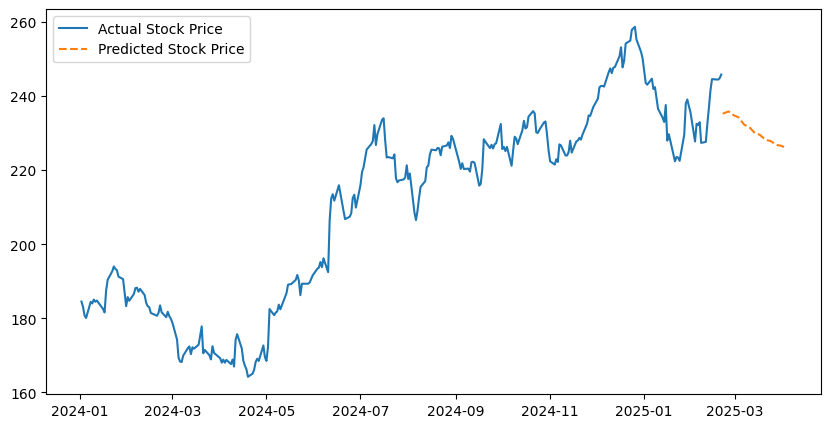

In [29]:
# Assuming 'df' is your original DataFrame with a DateTime index
last_date = df.index[-1]  # Get the last date in your dataset

# Generate future dates (30 business days ahead)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Create DataFrame for predictions
forecast = pd.DataFrame(future_pred_actual, index=forecast_dates, columns=['Prediction'])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Actual Stock Price')  # Assuming 'Close' is the stock price column
plt.plot(forecast.index, forecast['Prediction'], label='Predicted Stock Price', linestyle='dashed')
plt.legend()
plt.show()